In [131]:
import pandas as pd
import json 

In [132]:
DIR_PATH = "/Users/given/projects/sound-symbolism/results/logit_lens"

WORD_GROUP = "common"

In [133]:
def get_logit_lens(input_type):
    file_path = f"{DIR_PATH}/{input_type}_common.json"
    with open(file_path, 'r') as file:
        logit_lens_results = json.load(file)
    
    return logit_lens_results

In [134]:
import numpy as np
import matplotlib.pyplot as plt

def plot_probs(results, key, input_type, log_scale=False):
    probs, is_correct = results
    lang, word, dim = key.split("_")
    title = f"{word} ({lang})  : {input_type} : {is_correct}"
    
    data = np.array(probs)
    y1 = data[:, 0]
    y2 = data[:, 1]
    x = np.arange(len(y1))
    
    # Pick colors for each curve
    color1 = 'yellow'
    color2 = 'orange'
    
    plt.figure(figsize=(8, 4))
    
    # Plot curves
    plt.plot(x, y1, label=f'{dim.split("-")[0]}', color=color1)
    plt.plot(x, y2, label=f'{dim.split("-")[1]}', color=color2)
    
    # Max point for y1
    max_idx_y1 = np.argmax(y1)
    max_val_y1 = y1[max_idx_y1]
    plt.scatter(max_idx_y1, max_val_y1, color=color1, s=100, zorder=5)
    plt.text(max_idx_y1, max_val_y1, f"{max_val_y1:.3g}",
             color=color1, fontsize=10, ha='left', va='bottom')
    
    # Max point for y2
    max_idx_y2 = np.argmax(y2)
    max_val_y2 = y2[max_idx_y2]
    plt.scatter(max_idx_y2, max_val_y2, color=color2, s=100, zorder=5)
    plt.text(max_idx_y2, max_val_y2, f"{max_val_y2:.3g}",
             color=color2, fontsize=10, ha='left', va='bottom')
    
    # Last point of y1
    last_x1 = x[-1]
    last_y1 = y1[-1]
    plt.scatter(last_x1, last_y1, color=color1, marker='^', s=100, zorder=5)
    plt.text(last_x1, last_y1, f"{last_y1:.3g}",
             color=color1, fontsize=10, ha='left', va='bottom')
    
    # Last point of y2
    last_x2 = x[-1]
    last_y2 = y2[-1]
    plt.scatter(last_x2, last_y2, color=color2, marker='^', s=100, zorder=5)
    plt.text(last_x2, last_y2, f"{last_y2:.3g}",
             color=color2, fontsize=10, ha='left', va='bottom')
    
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    
    if log_scale:
        plt.yscale('log')
    
    plt.tight_layout()
    plt.show()

In [135]:
original = get_logit_lens("original")
ipa = get_logit_lens("ipa")
audio = get_logit_lens("audio")
original_and_audio = get_logit_lens("original_and_audio")
ipa_and_audio = get_logit_lens("ipa_and_audio")

In [136]:
# intersection keys for all 
intersection_keys = list(
    set(original.keys()) & set(ipa.keys()) & set(audio.keys()) & set(original_and_audio.keys()) & set(ipa_and_audio.keys())
)

In [137]:
def get_results(logit_lens_results, key):
    probs = []
    is_correct = None
    for layer_id, v in logit_lens_results[key].items():
        if isinstance(v, bool): 
            is_correct = v
        else:
            probs.append(v["choice"]["prob"])
    
    return probs, is_correct 
    

In [138]:
import random 
KEY = random.choice(intersection_keys)

In [139]:
original_results = get_results(original, KEY)
audio_results = get_results(audio, KEY)
original_and_audio_results = get_results(original_and_audio, KEY)


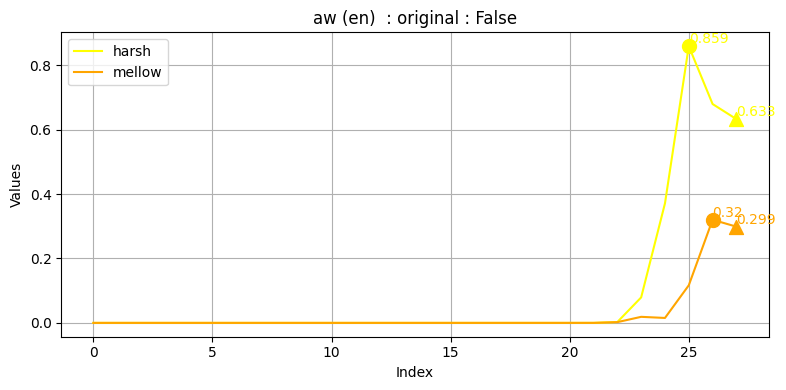

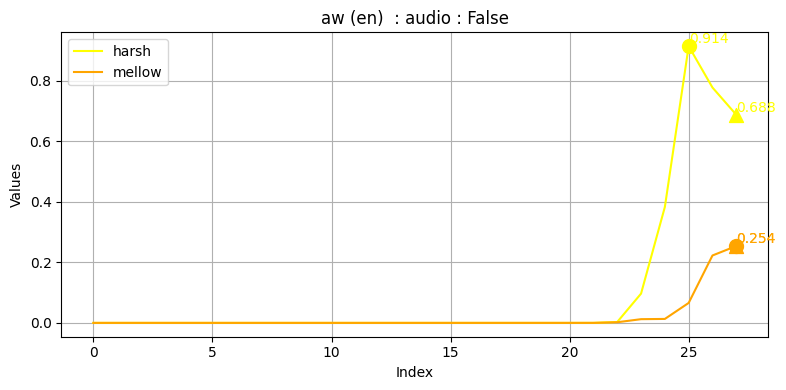

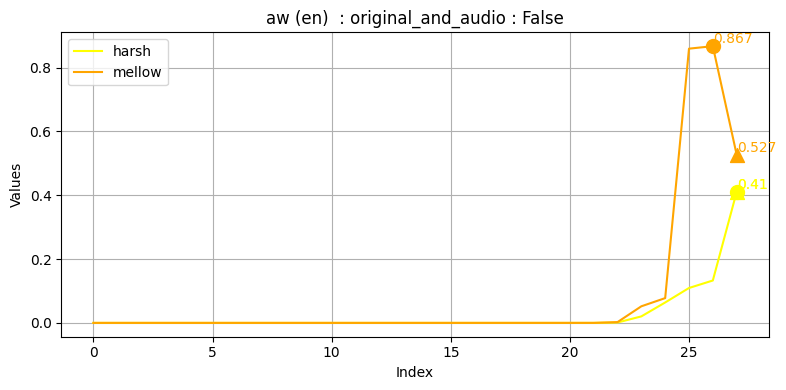

In [140]:
plot_probs(original_results, KEY, "original")
plot_probs(audio_results, KEY, "audio")
plot_probs(original_and_audio_results, KEY, "original_and_audio")
